In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'matplotlib'

img = cv.imread('C:/Users/koosha/Desktop/New folder (2)/aks1.jpg')
new_img = np.zeros(img.shape,img.dtype)
alpha = float(input('inter your number:'))
beta = int(input('inter your number:'))
new_img = cv.convertScaleAbs(img,alpha=alpha,beta=beta)
plt.figure(figsize=[10,5])
plt.subplot(121);plt.imshow(img[...,::-1]);plt.title('original image')
plt.subplot(122);plt.imshow(new_img[...,::-1]);plt.title('output image')


In [245]:
# تمرین pop effect

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

def draw_circle(event,x,y,flags,param):
    global img
    if event == cv.EVENT_LBUTTONDOWN:
        bgr = img[x:x+1,y:y+1,:]
        print('BGR',bgr)
        hsv = cv.cvtColor(bgr,cv.COLOR_BGR2HSV)
        print('HSV',hsv)
        cv.circle(img,(x,y),5,(0,255,0),+2)
img = cv.imread('C:/Users/koosha/Desktop/New folder (2)/aks1.jpg')


cv.namedWindow('image')
cv.setMouseCallback('image',draw_circle)

while (1):
    cv.imshow('image',img)
    if cv.waitKey(1) & 0xff == 27:
        break
cv.destroyAllWindows()

def pop_effect(image,lower,upper):
    img = image.copy()
    hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
    gray  = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    mask = cv.inRange(hsv,lower,upper)
    mask_inv = cv.bitwise_not(mask)
    res = cv.bitwise_and(img,img,mask=mask)
    background = cv.bitwise_and(gray,gray,mask=mask_inv)
    background = cv.merge([background]*3)
    return cv.add(res,background)

image  = cv.imread('C:/Users/koosha/Desktop/New folder (2)/aks1.jpg')

plt.figure(figsize=[12,7])
plt.subplot(231);plt.imshow(image[...,::-1]);plt.title('original')







color = ('b','g','r')
plt.subplot(234)
for i,col in enumerate(color):
    histo = cv.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histo,color = col)



Text(0.5, 1.0, 'equalized original')

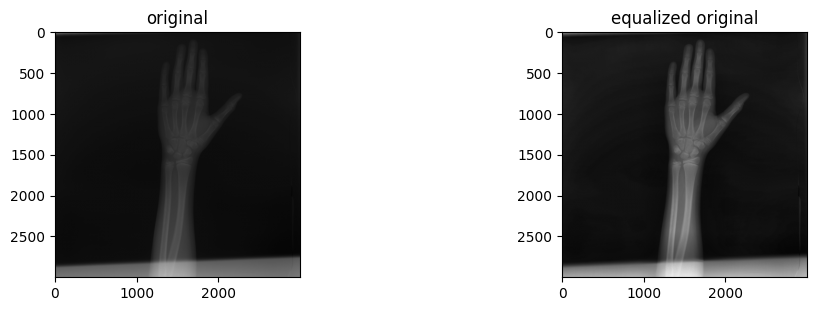

In [246]:
image = cv.imread('C:/Users/koosha/Desktop/New folder (3)/dast1.jpg',0)
clahe = cv.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
result = clahe.apply(image)

plt.figure(figsize=[12,7])
plt.subplot(221);plt.imshow(image,cmap='gray');plt.title('original')
plt.subplot(222);plt.imshow(result,cmap='gray');plt.title('equalized original')





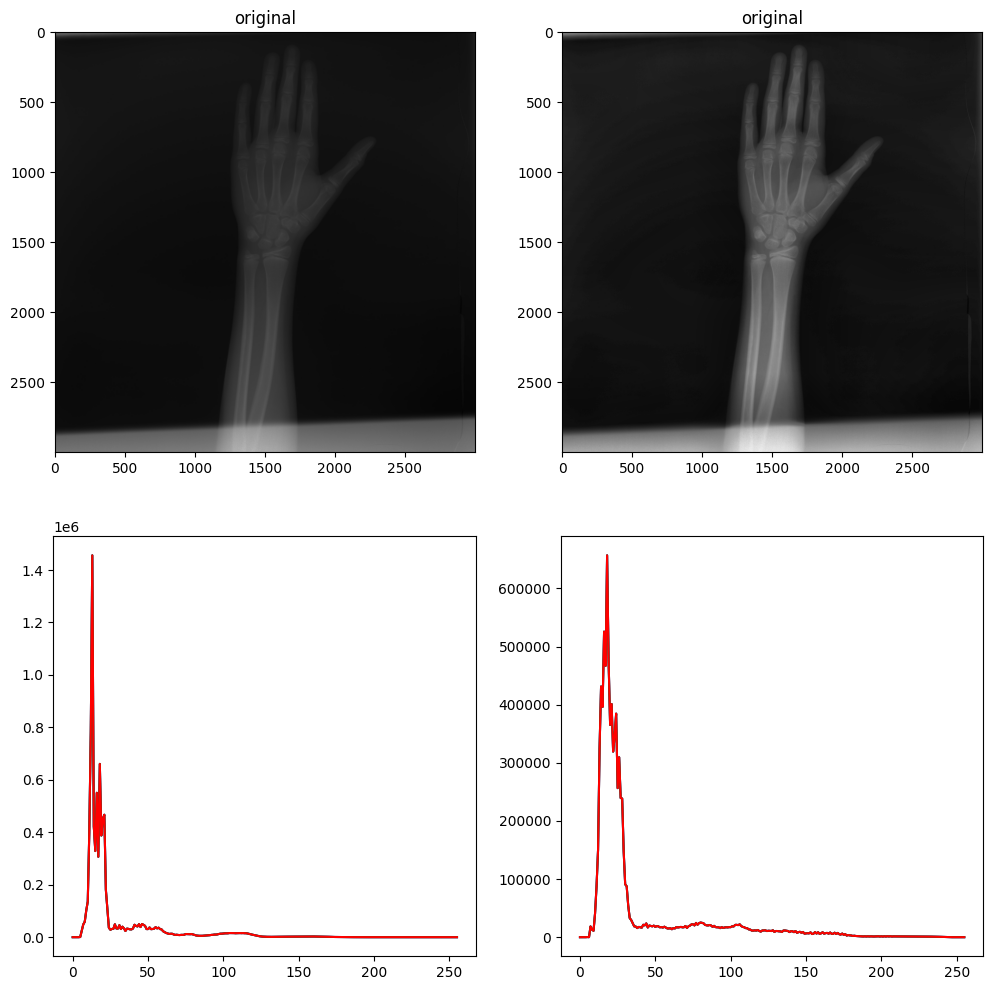

In [247]:
image = cv.imread('C:/Users/koosha/Desktop/New folder (3)/dast1.jpg')
channels = cv.split(image)
clahe = cv.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
eq_channels = []
for ch in channels:
    eq_channels.append(clahe.apply(ch))
clahe_eq_image = cv.merge(eq_channels)
plt.figure(figsize=[12,12])
plt.subplot(221),plt.imshow(image[...,::-1]);plt.title('original')
plt.subplot(222),plt.imshow(clahe_eq_image[...,::-1]);plt.title('original')

color = ('b','g','r')
plt.subplot(223)
for i,col in enumerate(color):
    histo = cv.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histo,color = col)



plt.subplot(224)
for i,col in enumerate(color):
    histo = cv.calcHist([clahe_eq_image],[i],None,[256],[0,256])
    plt.plot(histo,color = col)



